# Task 1: Single-particle basis

We will here discuss how to set up the single-particle basis for the Hamiltonian used by {cite}`zanghellini_2004`. To achieve this we will solve the one-body Hamiltonian on a grid using finite differences. This will give us an approximation to the eigenstates and eigenenergies of the non-interacting single-particle problem.

## One-body harmonic oscillator Hamiltonian

In {cite}`zanghellini_2004` they look at two particles in a one-dimensional Hamiltonian coupled with a soft Coulomb interaction.
We will use a single-particle basis of one-dimensional harmonic oscillator eigenfunctions.
To construct this basis we diagonalize a one-dimensional harmonic oscillator Hamiltonian without the interaction term.
The Hamiltonian is then given by
\begin{align}
    \hat{h}
    = -\frac{1}{2} \frac{\text{d}^2}{\text{d}x^2}
    + \frac{1}{2} \omega^2 \hat{x}^2,
\end{align}
where we use natural units with $\hbar = m = 1$.
We proceed by solving the time-independent Schrödinger equation, viz.
\begin{align}
    \hat{h}|\chi_{\alpha}\rangle
    = \epsilon_{\alpha}|\chi_{\alpha}\rangle,
\end{align}
where $\epsilon_{\alpha}$ are the eigenenergies and $|\chi_{\alpha}\rangle$ the corresponding eigenstates.
We already know the answers to this equation from {cite}`griffiths2010introduction`.
The eigenenergies are $\epsilon_{\alpha} = \omega(\alpha + 1/2)$ for the energies and
\begin{align}
    \chi_{\alpha}(x) = \left(\frac{\omega}{\pi}\right)^{1 / 4}
    \frac{1}{\sqrt{2^{\alpha} \alpha!}} H_{\alpha}(\sqrt{\omega} x),
\end{align}
for the eigenstates projected onto $x$.
The $H_{\alpha}(x)$ are the physicists' Hermite polynomials.

## Setting up the basis using finite-differences

We will however be using the [quantum-systems library](https://github.com/Schoyen/quantum-systems) to set up our basis functions.
This library uses finite-differences to solve the one-body Hamiltonian as this allows for arbitrary potentials of the form $\hat{v}(x)$.


```{note}
Add theory on how the diagonalization is done.
```

We choose a basis of the $l$ first eigenstates.

### Matrix elements

The matrix elements we will be needing for this project are:
\begin{gather}
    h_{\alpha \beta} = \langle \chi_{\alpha} | \hat{h} | \chi_{\beta} \rangle
    = \epsilon_{\beta} \delta_{\alpha \beta}, \\
    u^{\alpha \beta}_{\gamma \delta}
    = \langle \chi_{\alpha} \chi_{\beta} | \hat{u} | \chi_{\gamma} \chi_{\delta} \rangle
    = \int \text{d}x_1 \text{d}x_2
    \frac{
        \chi^{*}_{\alpha}(x_1)
        \chi^{*}_{\beta}(x_2)
        \chi_{\gamma}(x_1)
        \chi_{\delta}(x_2)
    }{
        \sqrt{(x_1 - x_2)^2 + a^2}
    }, \\
    x_{\alpha \beta}
    = \langle \chi_{\alpha} | \hat{x} | \chi_{\beta} \rangle
    = \int \text{d} x
    \chi^{*}_{\alpha}(x)
    x
    \chi_{\beta}(x),
\end{gather}
where the position matrix elements $x_{\alpha \beta}$ will be used for the laser field.
We will also need a representation of the single-particle functions on a grid, i.e., $\chi_{\alpha}(x)$.
Luckily, quantum-systems will construct all of these matrix elements and single-particle functions for us.
Below we demonstrate how these states can be found from the library.

In [6]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from quantum_systems import ODQD

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
l = 10  # Number of eigenstates
grid_length = 10  # The width of the one-dimensional grid
num_grid_points = 2001  # The number of discretized points on the grid.
# More points give better results for the single-particle basis at the cost of slower setup.

alpha = 1  # The strength of the Coulomb interaction
a = 0.25  # The shielding parameter in the Coulomb interaction potential

omega = 0.25  # The frequency of the harmonic oscillator trap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
potential = ODQD.HOPotential(omega=omega)  # Harmonic oscillator potential

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For examples on how to create your own potential see here: https://github.com/Schoyen/quantum-systems/blob/master/quantum_systems/quantum_dots/one_dim/one_dim_potentials.py

Below we construct the basis set.

In [18]:
odqd = ODQD(
    l=l,
    grid_length=grid_length,
    num_grid_points=num_grid_points,
    alpha=alpha,
    a=a,
    potential=potential,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The listed matrix elements can now be found from `odqd`.

1. The one-body Hamiltonian $h_{\alpha \beta}$ are found in `odqd.h`.
2. The two-body Coulomb interaction matrix elements $u^{\alpha \beta}_{\gamma \delta}$ are found in `odqd.u`.
3. The one-body position matrix elements $x_{\alpha \beta}$ are found in `odqd.position[0]`, where the index `0` is included in case of higher-dimensional systems. In our case there is only the one and `odqd.position.shape == (1, odqd.l, odqd.l)`.
4. The evaluated (evaluated at the grid) single-particle functions `\chi_{\alpha}(x)` are found in `odqd.spf`, where `odqd.spf.shape == (odqd.l, num_grid_points)`. That is, the ground state harmonic oscillator single-particle function is found from `odqd.spf[0]`.
5. The discretized grid can be accessed from `odqd.grid`.

Note that all matrix elements and basis functions are inherently complex with the imaginary part being zero.
The ground-state solutions will be real, but when we include time-evolution everything will become complex and to avoid problems with data types when using NumPy we start of with complex matrix elements.

### Plotting the basis elements

Below we demonstrate how the single-particle functions can be plotted on the grid along with the harmonic oscillator potential.

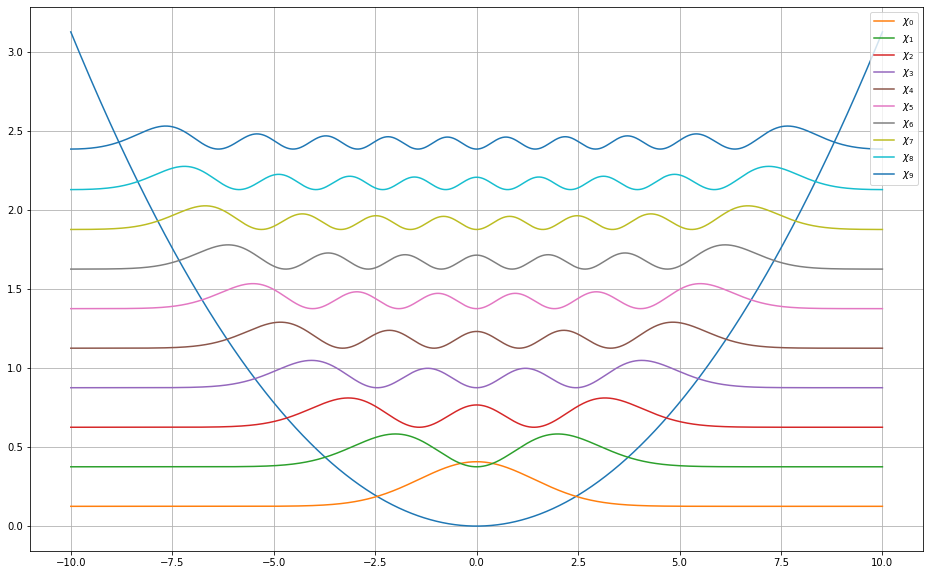

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
fig = plt.figure(figsize=(16, 10))

plt.plot(odqd.grid, potential(odqd.grid))

for i in range(l):
    plt.plot(
        odqd.grid,
        np.abs(odqd.spf[i]) ** 2 + odqd.h[i, i].real,
        label=r"$\chi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()